In [3]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s - loss: 0.3749 - val_loss: 0.2727
Epoch 2/10
60000/60000 [==============================] - 10s - loss: 0.2658 - val_loss: 0.2561
Epoch 3/10
60000/60000 [==============================] - 10s - loss: 0.2462 - val_loss: 0.2342
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 0.2252 - val_loss: 0.2141
Epoch 5/10
60000/60000 [==============================] - 9s - loss: 0.2083 - val_loss: 0.2003
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 0.1969 - val_loss: 0.1908
Epoch 7/10
60000/60000 [==============================] - 9s - loss: 0.1886 - val_loss: 0.1836
Epoch 8/10
60000/60000 [==============================] - 9s - loss: 0.1818 - val_loss: 0.1772
Epoch 9/10
60000/60000 [==============================] - 9s - loss: 0.1759 - val_loss: 0.1718
Epoch 10/10
60000/60000 [==============================] - 9s - loss: 0.1707 - val_loss: 0.1

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

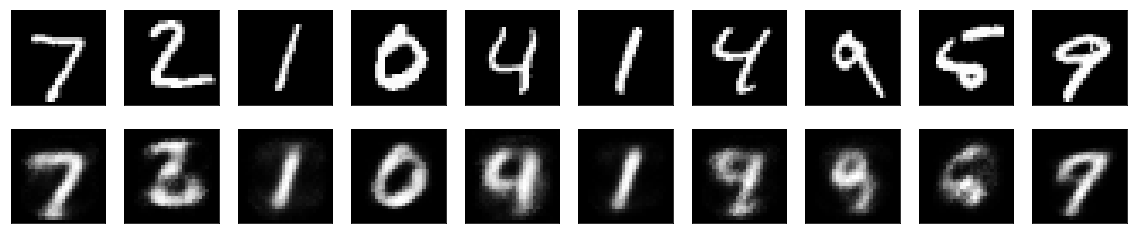

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()